In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
data=pd.read_excel("WOC training.xlsx")
data.tail()

,Year,USA,China,Australia,World
36,2001,10636.848633,2683.249268,457.085358,43255.683594
37,2002,10642.413086,2895.597900,461.974823,43608.863281
38,2003,10803.682617,3234.762451,460.259918,44580.648438
39,2004,11197.867188,3777.772217,471.295715,46270.656250
40,2005,11214.078125,3838.487061,478.701874,46672.656250


In [4]:
data.describe()

,Year,USA,China,Australia,World
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,1985.000000,9301.646187,1370.615776,364.393897,35066.132241
std,11.979149,1157.809296,966.514212,71.123458,7070.032967
min,1965.000000,6414.477051,129.062531,200.019363,17989.603516
25%,1975.000000,8573.317383,804.078247,330.978943,32534.806641
50%,1985.000000,9376.044922,1076.636841,362.620819,35514.421875
75%,1995.000000,10251.112305,1825.630737,427.777496,39442.175781
max,2005.000000,11214.078125,3838.487061,478.701874,46672.656250


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       41 non-null     int64  
 1   USA        41 non-null     float64
 2   China      41 non-null     float64
 3   Australia  41 non-null     float64
 4   World      41 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.7 KB


In [6]:
X=data["Year"].values
y=data["China"].values

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [110]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, test_size=0.25)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [111]:
model=LinearRegression()

In [112]:
model.fit(x_train,y_train)

LinearRegression()

In [113]:
y_predicted=model.predict(x_test)

In [114]:
model.score(x_test,y_test)

0.8658197813560254

In [121]:
df=pd.read_excel("WOC testing.xlsx")
df.head()

,Year,USA,USA Pred,China,China Pred,Australia,Aus Pred,World,World Pred
0,2006,11070.909180,10155.576478,4116.769043,NaN,493.641815,NaN,47172.609375,NaN
1,2007,11001.755859,10134.607027,4313.567383,NaN,506.270294,NaN,47758.875000,NaN
2,2008,10273.695312,10113.637575,4408.091797,NaN,512.715942,NaN,47338.687500,NaN
3,2009,9737.244141,10092.668124,4580.298340,NaN,504.140778,NaN,46371.566406,NaN
4,2010,9891.227539,10071.698673,5214.490234,NaN,519.306824,NaN,47895.074219,NaN


In [116]:
a=df['Year'].values
a=a.reshape(-1,1)
b=df['China'].values

In [117]:
y_pred=model.predict(a)

In [118]:
model.score(a,b)

-3.235214892390113

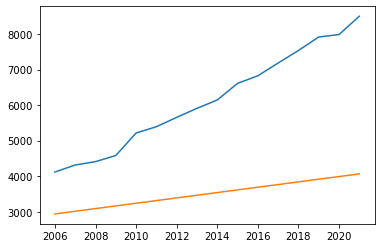

In [119]:
plt.plot(a,b)
plt.plot(a,y_pred)

In [32]:
y_pred

array([2926.37134135, 3002.16675535, 3077.96216936, 3153.75758336,
       3229.55299736, 3305.34841137, 3381.14382537, 3456.93923937,
       3532.73465338, 3608.53006738, 3684.32548138, 3760.12089539,
       3835.91630939, 3911.71172339, 3987.5071374 , 4063.3025514 ])

In [120]:
df.tail()

,Year,USA,USA Pred,China,China Pred,Australia,Aus Pred,World,World Pred
11,2017,10057.775391,9924.912513,7183.171875,NaN,599.579773,NaN,52515.542969,NaN
12,2018,10299.730469,9903.943062,7534.662109,NaN,610.111206,NaN,53250.621094,NaN
13,2019,10283.932617,9882.973611,7915.177734,NaN,604.194458,NaN,53368.628906,NaN
14,2020,9032.397461,9862.004160,7984.452637,NaN,522.167236,NaN,48380.710938,NaN
15,2021,9813.041016,9841.034708,8499.583008,NaN,536.348999,NaN,51170.472656,NaN


In [123]:
df=pd.read_excel("WOC testing.xlsx")
df.head()

,Year,USA,USA Pred,China,China Pred,Australia,Aus Pred,World,World Pred
0,2006,11070.909180,10155.576478,4116.769043,5852.742683,493.641815,NaN,47172.609375,NaN
1,2007,11001.755859,10134.607027,4313.567383,6004.333511,506.270294,NaN,47758.875000,NaN
2,2008,10273.695312,10113.637575,4408.091797,6155.924339,512.715942,NaN,47338.687500,NaN
3,2009,9737.244141,10092.668124,4580.298340,6307.515167,504.140778,NaN,46371.566406,NaN
4,2010,9891.227539,10071.698673,5214.490234,6459.105995,519.306824,NaN,47895.074219,NaN


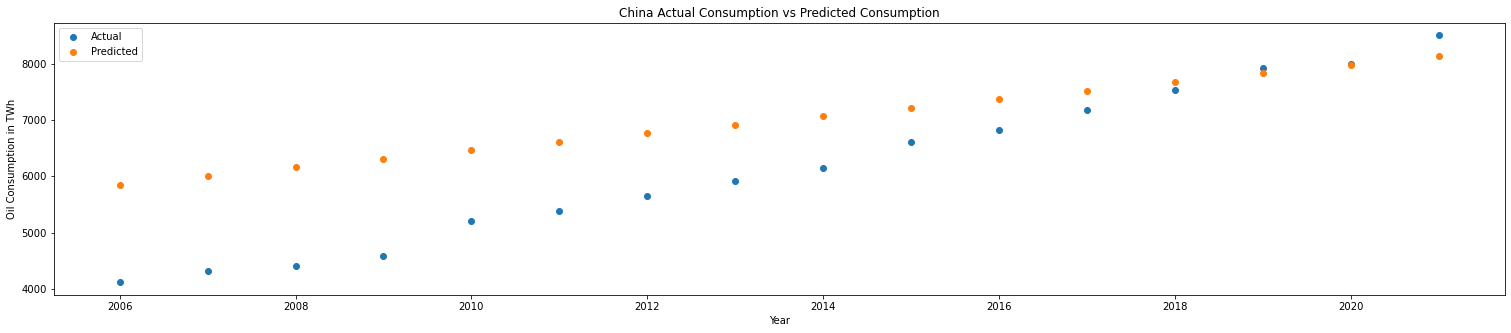

In [125]:
plt.figure(figsize=(26,5))
plt.scatter(df.Year, df.China)
plt.scatter(df.Year,df['China Pred'])
plt.xlabel("Year")
plt.ylabel("Oil Consumption in TWh")
plt.title("China Actual Consumption vs Predicted Consumption")
plt.legend(["Actual",'Predicted'], loc=0)